In [1]:
from iminuit import Minuit, cost
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
# from tiling_disk_plots import coordinates_plot
from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu
from disk_analysis_tools import tiling_disk_optim as optim

%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("talk")

#? one Hexagon has 4 rings of points. 1 is the most inner one, 4 is the most outer
ring_1 = [1, 36, 19, 18]
ring_2 = [2,3,4,33,34,35,20,21,22,15,16,17]
ring_3 = [9,8,7,6,5, 32,31,30,29,28,
          27,26,25,24,23, 14,13,12,11,10]
ring_4 = list(range(37, 61, 1))
rings = [ring_1, ring_2, ring_3, ring_4]

In [2]:
def old_point_table(data, z_col='z'):
    point_table = pd.pivot_table(data, values=['x','y' ,f'{z_col}'], index=['hex_nr', 'point'],
                        aggfunc={
                            f'{z_col}': [tdu.nan_mean, tdu.measurement_error], #? mesurement Error = sqrt(standard_error + systematic_error),
                            'x': np.mean,
                            'y': np.mean,})
# print(point_table)
    point_table['x'] = point_table['x'].apply(lambda x: round(x,2))
    point_table['y'] = point_table['y'].apply(lambda x: round(x,2))
    point_table.columns = ['_'.join(col).rstrip('_') for col in point_table.columns.values]
    point_table.rename(columns = {'x_mean':'x', 'y_mean':'y',
                                    f'{z_col}_nan_mean': 'z_mean',
                                    f'{z_col}_measurement_error': 'z_err',
                                    }, inplace = True)
    point_table.reset_index(inplace=True)
    return point_table

# Steel Plate NoVac

In [3]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements'
meas_files = tdu.read_txt_files(measurement_folder/ 'Old_SteelScan_Test1', old=True)

## Table data

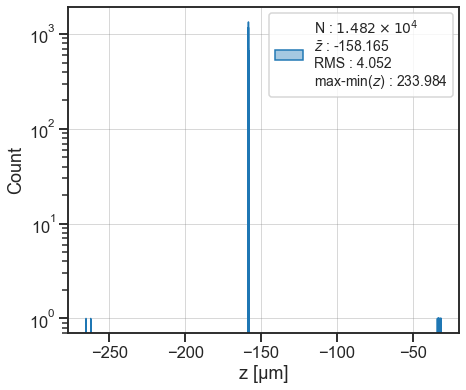

In [4]:
table_raw_data = meas_files['210921_Table.txt']
tdp.ts_hist(table_raw_data)
plt.yscale('log')

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

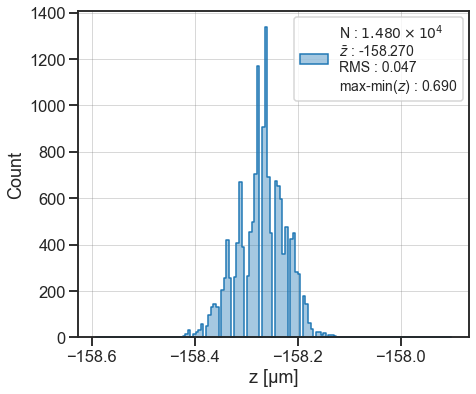

In [5]:
table_raw_data = table_raw_data.loc[table_raw_data.z < -100,:]
table_raw_data = table_raw_data.loc[-200 < table_raw_data.z,:]
tdp.ts_hist(table_raw_data)

In [6]:
table_pt = old_point_table(table_raw_data, z_col='z')

## Steel data

In [7]:
Steel_NoVac_raw_data = meas_files['210921_SteelAll_NoVac.txt']

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

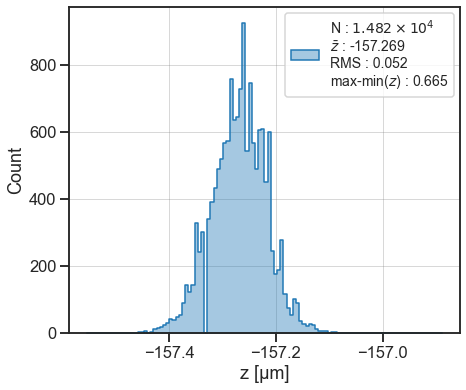

In [8]:
tdp.ts_hist(Steel_NoVac_raw_data)

In [9]:
Steel_NoVac_raw_data = tdu.remove_outliers(Steel_NoVac_raw_data, cut_threshold=0.2)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

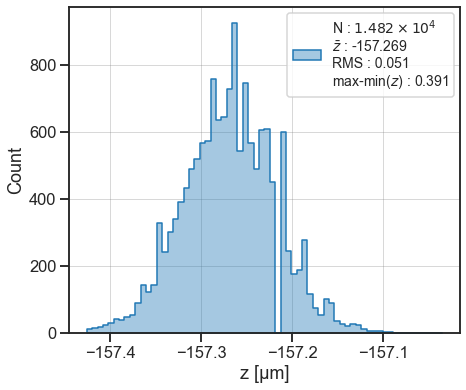

In [10]:
tdp.ts_hist(Steel_NoVac_raw_data, mode='z_clean')

In [11]:
steel_NoVac_pt = old_point_table(Steel_NoVac_raw_data, z_col='z_clean')

In [12]:
steel_novac_sub_table_pt = tdu.combine_mean_measurements(steel_NoVac_pt, table_pt)

In [14]:
steel_novac_sub_table_pt.z_mean = tdu.convert_mm_to_microns(steel_novac_sub_table_pt.z_mean)
steel_novac_sub_table_pt.z_mean = tdu.subtract_mean(steel_novac_sub_table_pt.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

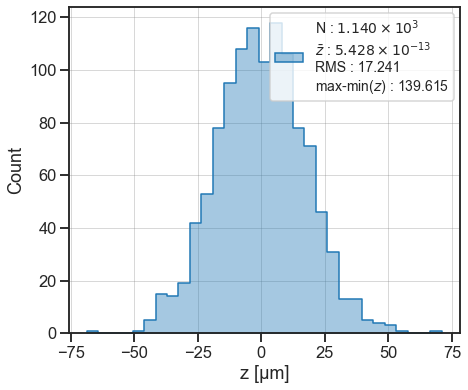

In [15]:
tdp.ts_hist(steel_novac_sub_table_pt, mode='z_mean')

### steel novac - table

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

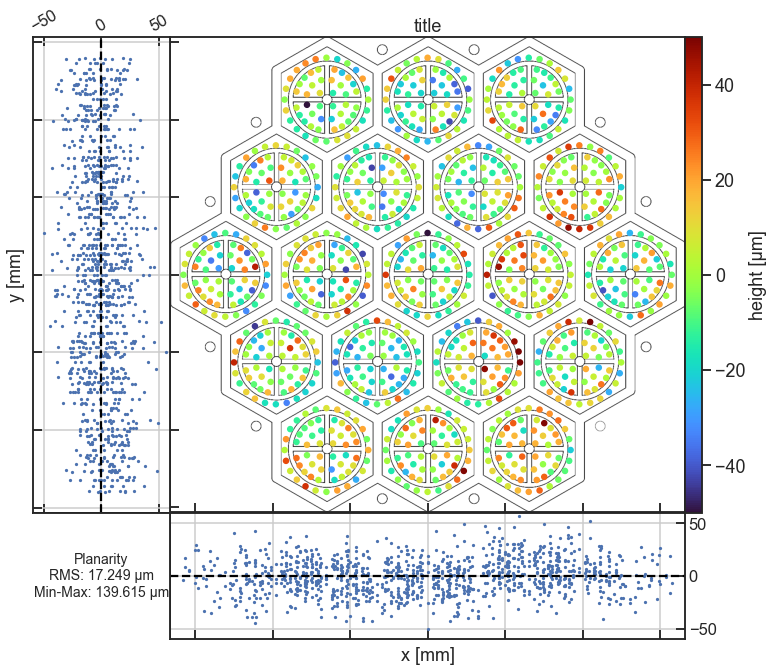

In [17]:
%matplotlib inline
tdp.plot_table_hexagon_flatness(steel_novac_sub_table_pt,
                                cbar_norm=(-50, 0, 50),
                                # size=3**2, 
                                )

## Steelplate vac

In [18]:
Steel_Vac_raw_data = meas_files['210921_SteelAll_Vac.txt']

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

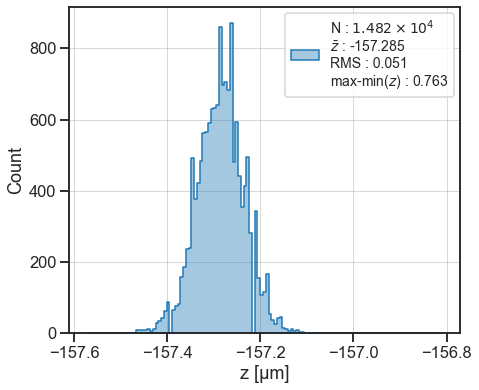

In [19]:
tdp.ts_hist(Steel_Vac_raw_data)

In [20]:
Steel_Vac_raw_data = tdu.remove_outliers(Steel_Vac_raw_data, cut_threshold=0.2)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

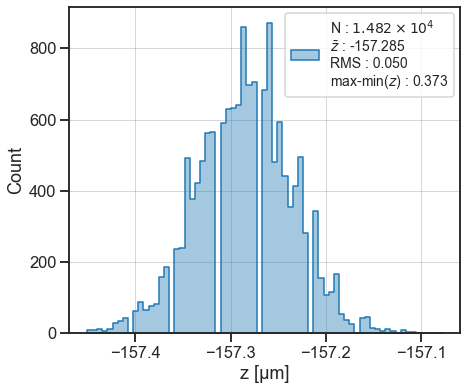

In [24]:
tdp.ts_hist(Steel_Vac_raw_data, mode='z_clean')

In [25]:
steel_Vac_pt = old_point_table(Steel_Vac_raw_data, z_col='z_clean')

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

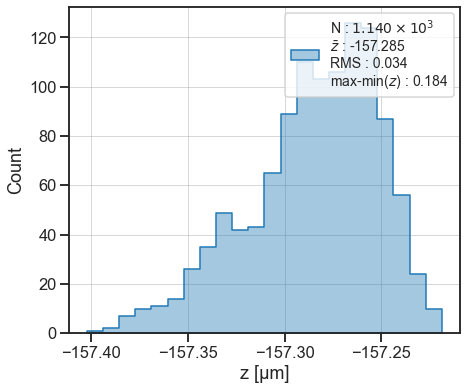

In [26]:
tdp.ts_hist(steel_Vac_pt,mode='z_mean')

## steel vac - novac

In [27]:
steel_Vac_NoVac_pt = tdu.combine_mean_measurements(steel_Vac_pt, steel_NoVac_pt)

In [28]:
steel_Vac_NoVac_pt.z_mean = tdu.convert_mm_to_microns(steel_Vac_NoVac_pt.z_mean)
steel_Vac_NoVac_pt.z_mean = tdu.subtract_mean(steel_Vac_NoVac_pt.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

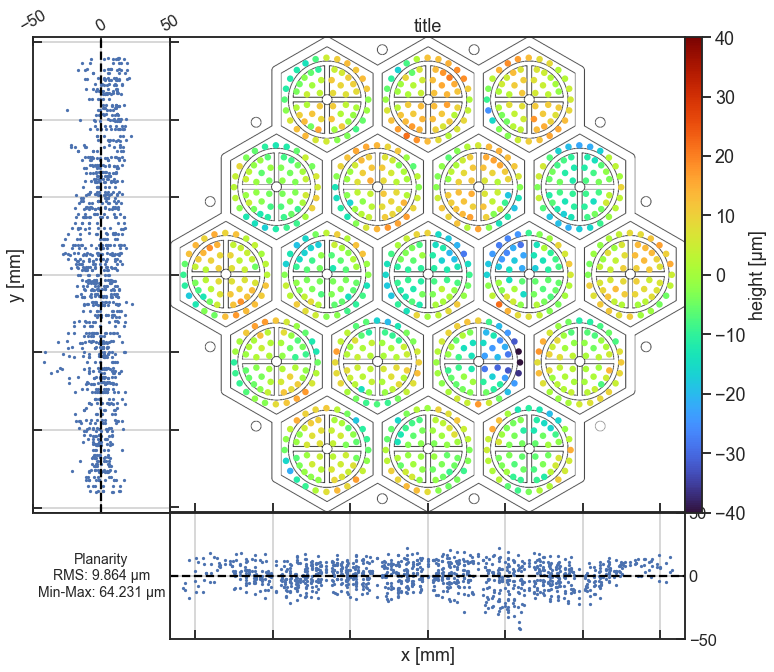

In [29]:
tdp.plot_table_hexagon_flatness(steel_Vac_NoVac_pt, cbar_norm=(-40, 0, 40))

# hexagon r vs z plots

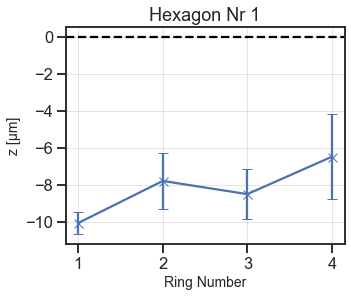

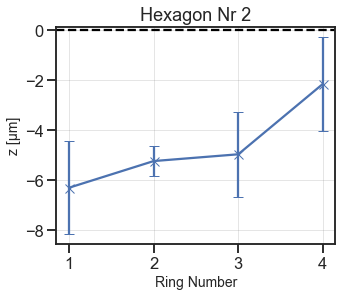

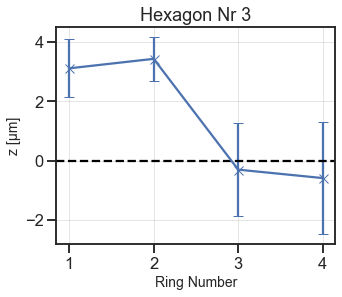

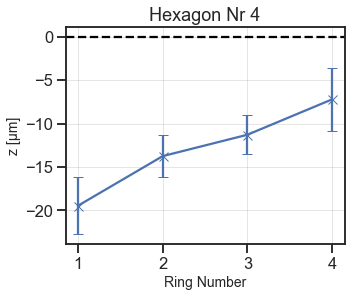

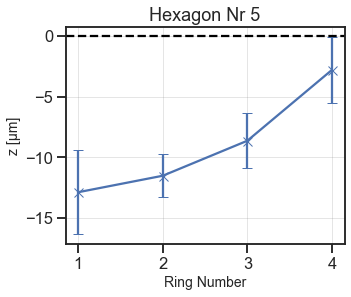

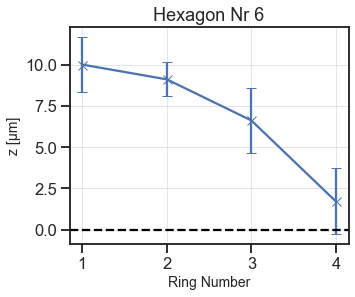

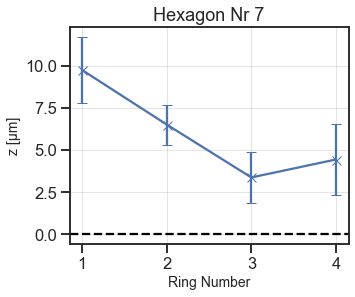

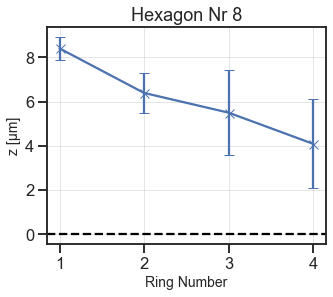

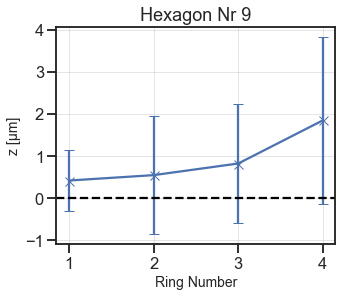

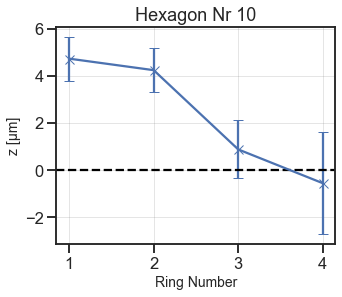

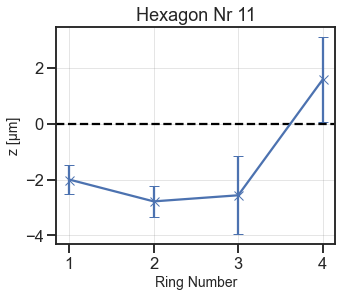

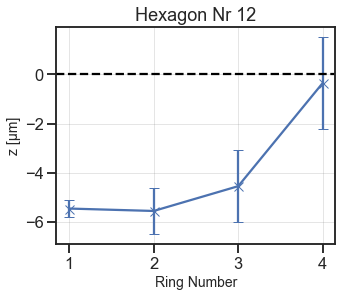

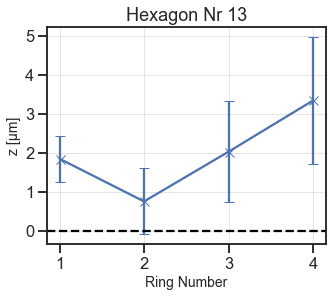

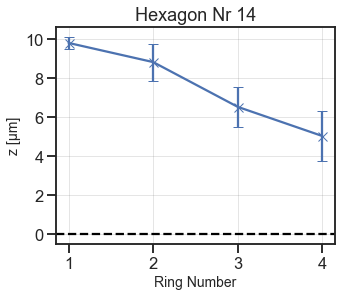

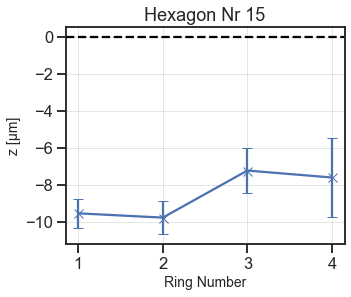

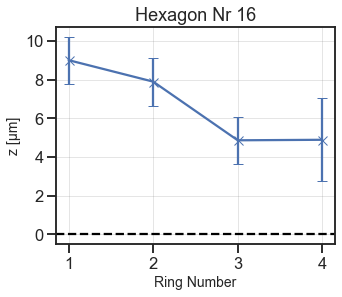

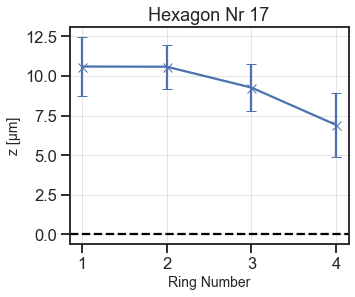

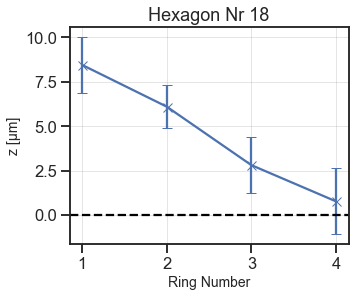

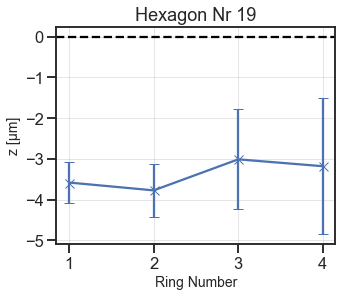

In [30]:
full_plate_mean = steel_Vac_NoVac_pt.z_mean.mean()
for hexagon in steel_Vac_NoVac_pt.hex_nr.unique():
    data = steel_Vac_NoVac_pt.query(f'hex_nr == {hexagon}')

    ring_data = {f'data_r{num+1}': data.query(f'point in {ring}') for num, ring in enumerate(rings) }
    rings_estimates = []
    rings_errors = []
    for ring_nr in range(1,5,1):
        data_test = ring_data[f'data_r{ring_nr}']['z_mean'].to_numpy()
        ring_mean = np.mean(ring_data[f'data_r{ring_nr}']['z_mean'].to_numpy())
        ring_std = np.std(data_test) / np.sqrt(len(data_test))
        # ring_mad = np.mean(ring_data[f'data_r{ring_nr}']['z', 'std'].to_numpy() / (ring_data[f'data_r{ring_nr}']['z', 'std'].to_numpy()))
        rings_estimates.append(ring_mean)
        rings_errors.append(ring_std)
        
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    ax.errorbar(list(range(1,5,1)), rings_estimates, yerr=rings_errors, marker='x',capsize=5)
    ax.set_title(f'Hexagon Nr {hexagon}')
    ax.set_xlabel('Ring Number', fontsize=14)
    ax.set_ylabel('z [µm]', fontsize=14)
    ax.axhline(full_plate_mean,ls='--', c='black')
    plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)